## 로지스틱 회귀(Logistic Regression)
분류 문제를 위한 회귀 알고리즘으로,<br>
0에서 1사이의 값만 내보낼 수 있도록 출력값의 범위를 수정한 분류 알고리즘

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

### 데이터 생성

In [6]:
def load_data():
    
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y

### 시각화

In [2]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# plot을 그려주는 함수
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()

    plt.savefig('image.png')

### 모델 학습 및 결과

예측 결과 : [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


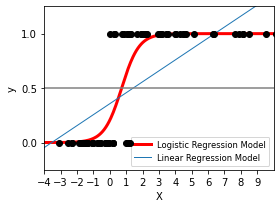

<Figure size 432x288 with 0 Axes>

In [7]:
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    
    logistic_model = LogisticRegression()
    logistic_model.fit(train_X, train_y)
    
    
    predicted = logistic_model.predict(test_X)
    

    
    
    # 예측 결과 확인하기 
    print("예측 결과 :", predicted[:10])
    
    plot_logistic_regression(logistic_model, train_X, train_y)
    
    return logistic_model

if __name__ == "__main__":
    main()


---

## 로지스틱 회귀 가정 함수

In [9]:
import numpy as np

### sigmoid 함수


In [11]:
def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))

### prediction 함수
설계 행렬 X, 파라미터 θ theta

In [12]:
def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    return sigmoid(X @ theta)

### 데이터 입력
로지스틱 회귀에서의 세타 값: 
처음 세타 값을 0 또는 임의 설정 후 ,
세타의 값을 업데이트 하여 손실을 점점 최소화

In [10]:
# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 파라미터 theta 정의
theta = [0.5, 0.3, -2, 0.2]  

In [13]:
prediction(X, theta)

array([0.26114999, 0.28699984, 0.37989357, 0.39174097, 0.57199613,
       0.55971365, 0.59868766, 0.54735762, 0.72312181, 0.80218389,
       0.86989153, 0.87653295, 0.85814894, 0.91293423, 0.86989153,
       0.9289057 ])

---

### 코드 정리

In [ ]:
import numpy as np

def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))
    

def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    return sigmoid(X@theta)
    

# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 파라미터 theta 정의
theta = [0.5, 0.3, -2, 0.2]  

prediction(X, theta)

---

## 로지스틱 회귀 경사 하강법

### gradient_descent함수
#### 파라미터
* 입력 변수 X, 
* theta, 
* 목표 변수 y, 
* 경사 하강 횟수 iterations,
* 학습률 alpha

return : 경사 하강법을 사용해서 찾은 최적화된 theta

In [14]:
def gradient_descent(X, theta, y, iterations, alpha):
    """로지스틱 회귀 경사 하강 알고리즘"""
    m = len(X)  # 입력 변수 개수 저장
    for _ in range(iterations):

        error = prediction(X, theta) - y
        theta -= alpha* (1/m) * (X.T @ error)
        # theta = theta - alpha / m * (X.T @ error)
        
    return theta

In [ ]:
''' ## 2
     for n in range(iterations):

        theta = theta - alpha/m * (prediction(X,theta) -y) @ X

        n=n-1 
        
    return theta
'''

In [15]:
import numpy as np

def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))
    
    
def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    return sigmoid(X@theta)

def gradient_descent(X, theta, y, iterations, alpha):
    """로지스틱 회귀 경사 하강 알고리즘"""
    m = len(X)  # 입력 변수 개수 저장
    for _ in range(iterations):
        error = prediction(X, theta) - y
        theta -= alpha* (1/m) * (X.T @ error)
    return theta
    
# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 목표 변수
passed = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])  # 시험 통과 여부 (0: 탈락, 1:통과)

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 입력 변수 y 정의
y = passed

theta = [0, 0, 0, 0]  # 파라미터 초기값 설정
theta = gradient_descent(X, theta, y, 300, 0.1)  # 경사 하강법을 사용해서 최적의 파라미터를 찾는다
theta

array([-1.35280508,  1.61640725, -1.83666046, -0.60286277])

---

### LogisticRegression에 정규화를 적용?
LogisticRegression : 자동으로 L2 정규화를 적용<br>
그래서 정규화를 적용하도록 따로 모델을 안 바꿔주어도 됨 <br>
모델의 penalty 라는 optinal parameter로 정해 줄 수 있다.

In [ ]:
LogisticRegression(penalty='none')  # 정규화 사용 안함
LogisticRegression(penalty='l1')  # L1 정규화 사용
LogisticRegression(penalty='l2')  # L2 정규화 사용
LogisticRegression()  # 위와 똑같음: L2 정규화 사용